In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt


In [2]:
# 이미지에서 히스토그램 
# - 사전에 정의된 BIN 군집으로 데이터 개수 세어 구성하는 것
# - 
# - 이미지 내의 픽셀 강도 분포를 보는 방법(그레이스케일)
# 참고: https://www.cambridgeincolour.com/tutorials/histograms1.htm

src = cv.imread("../samples/lena.jpg")

if src is None:
    print('Could not open or find the image:', args.input)
    exit(0)

# 이미지를 세 개의 채널 평면으로 나눔(BGR)
bgr_planes = cv.split(src)
bgr_planes[0].shape

(512, 512)

In [3]:
histSize = 256 # 0부터 255까지 = 256개
histRange = (0, 256) # 최상단 경계값은 무시된다
accumulate = False  # 히스토그램 크기 초기화

In [4]:
# 각 채널별로 히스토그램을 계산
b_hist = cv.calcHist(bgr_planes, [0], None, [histSize], histRange, accumulate=accumulate)
g_hist = cv.calcHist(bgr_planes, [1], None, [histSize], histRange, accumulate=accumulate)
r_hist = cv.calcHist(bgr_planes, [2], None, [histSize], histRange, accumulate=accumulate)

In [5]:
# 히스토그램을 띄워줄 이미지 생성
hist_w = 512
hist_h = 400
bin_w = int(round( hist_w/histSize ))
histImage = np.zeros((hist_h, hist_w, 3), dtype=np.uint8)

# 히스토그램 정규화: 안하면 어떻게 될까?
cv.normalize(b_hist, b_hist, alpha=0, beta=hist_h, norm_type=cv.NORM_MINMAX)
cv.normalize(g_hist, g_hist, alpha=0, beta=hist_h, norm_type=cv.NORM_MINMAX)
cv.normalize(r_hist, r_hist, alpha=0, beta=hist_h, norm_type=cv.NORM_MINMAX)

for i in range(1, histSize):
    cv.line(histImage, ( bin_w*(i-1), hist_h - int(b_hist[i-1]) ),
            ( bin_w*(i), hist_h - int(b_hist[i]) ),
            ( 255, 0, 0), thickness=2)
    cv.line(histImage, ( bin_w*(i-1), hist_h - int(g_hist[i-1]) ),
            ( bin_w*(i), hist_h - int(g_hist[i]) ),
            ( 0, 255, 0), thickness=2)
    cv.line(histImage, ( bin_w*(i-1), hist_h - int(r_hist[i-1]) ),
            ( bin_w*(i), hist_h - int(r_hist[i]) ),
            ( 0, 0, 255), thickness=2)
    
cv.imshow('Source image', src)
cv.imshow('calcHist Demo', histImage)
cv.waitKey()


C:\Users\user\AppData\Local\Temp\ipykernel_13700\656494200.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  cv.line(histImage, ( bin_w*(i-1), hist_h - int(b_hist[i-1]) ),
C:\Users\user\AppData\Local\Temp\ipykernel_13700\656494200.py:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  ( bin_w*(i), hist_h - int(b_hist[i]) ),
C:\Users\user\AppData\Local\Temp\ipykernel_13700\656494200.py:16: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  cv.line(histImage, ( bin_w*(i-

27

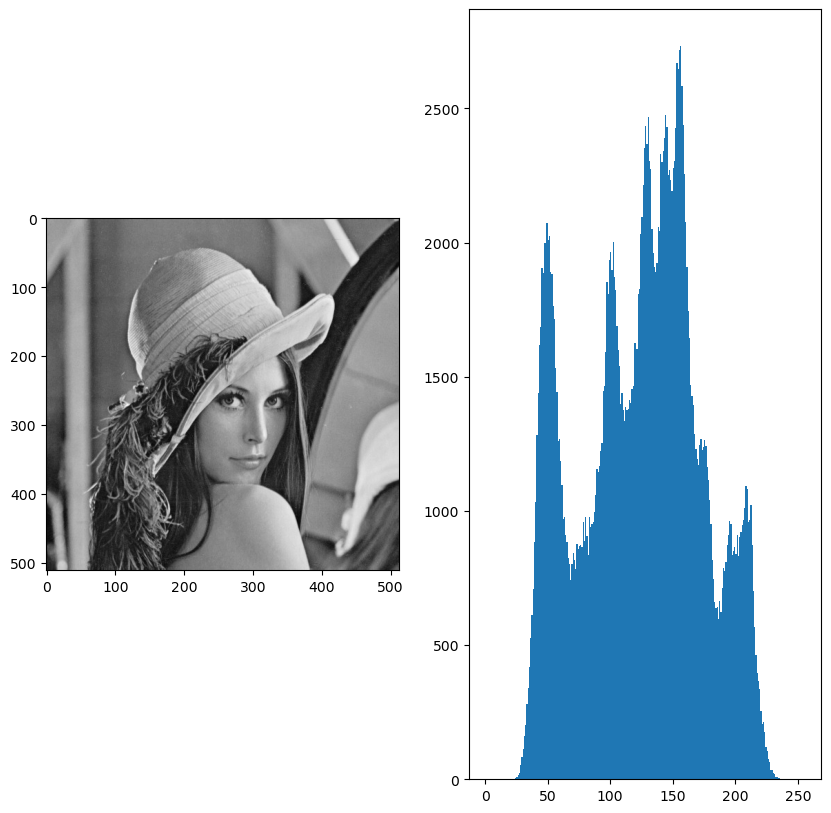

In [6]:
# 좀 더 쉬운 방법

fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

img = cv.imread('../samples/lena.jpg',0)

ax2.hist(img.ravel(),256,[0,256])
ax1.imshow(img, cmap='gray')

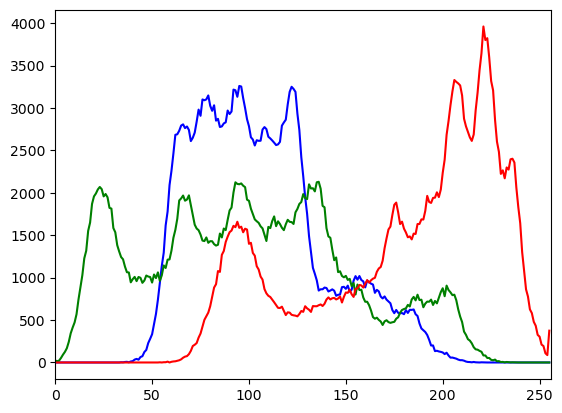

In [7]:
img = cv.imread('../samples/lena.jpg')
color = ('b','g','r')

for i,col in enumerate(color):
    histr = cv.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
    
plt.show()

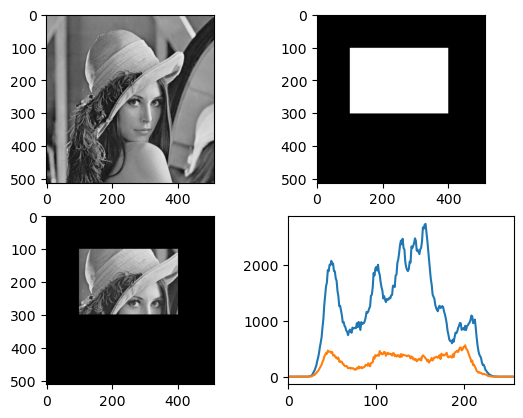

In [8]:
# 특정 영역의 히스토그램 확인하기

img = cv.imread('../samples/lena.jpg',0)

# create a mask
mask = np.zeros(img.shape[:2], np.uint8)
mask[100:300, 100:400] = 255
masked_img = cv.bitwise_and(img,img,mask = mask)

# Calculate histogram with mask and without mask
# Check third argument for mask
hist_full = cv.calcHist([img],[0],None,[256],[0,256])
hist_mask = cv.calcHist([img],[0],mask,[256],[0,256])

plt.subplot(221), plt.imshow(img, 'gray')
plt.subplot(222), plt.imshow(mask,'gray')
plt.subplot(223), plt.imshow(masked_img, 'gray')
plt.subplot(224), plt.plot(hist_full), plt.plot(hist_mask)
plt.xlim([0,256])
plt.show()

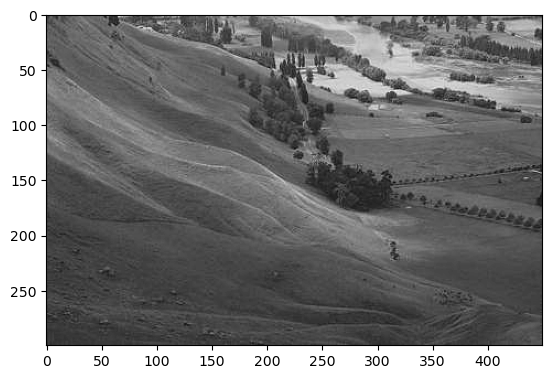

In [9]:
# 히스토그램 스트레칭(평탄화) : 히스토그램 분포를 완만하게 조정해 이미지의 명암 대비를 높일 수 있음

img = cv.imread('../samples/hawkes.bmp',0)
plt.imshow(img, cmap='gray')


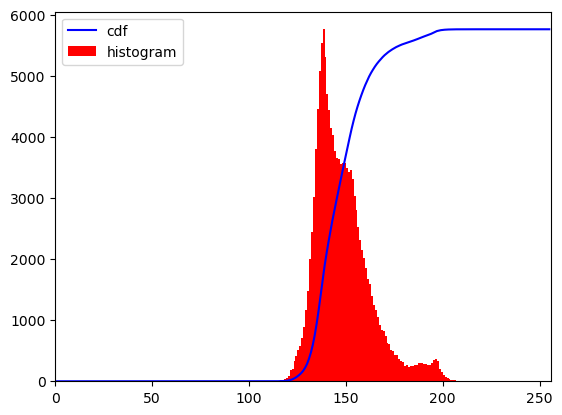

In [10]:

hist,bins = np.histogram(img.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()

plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()


In [11]:
cdf_m = np.ma.masked_equal(cdf,0)
cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
cdf = np.ma.filled(cdf_m,0).astype('uint8')

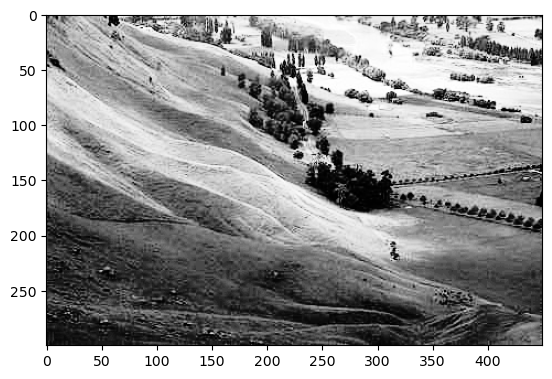

In [12]:
img2 = cdf[img]
plt.imshow(img2, cmap='gray')

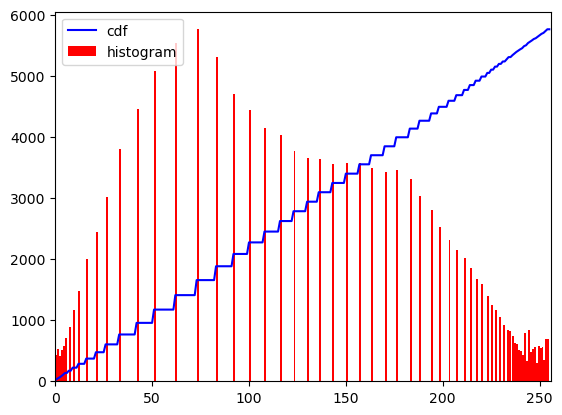

In [13]:

hist,bins = np.histogram(img2.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()

plt.plot(cdf_normalized, color = 'b')
plt.hist(img2.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

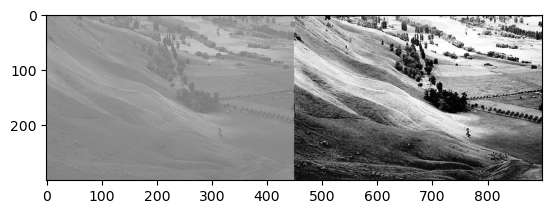

In [14]:
# 조금 더 쉬운 방법 equalizaHist()

img = cv.imread('../samples/hawkes.bmp',0)
equ = cv.equalizeHist(img)
res = np.hstack((img,equ)) #stacking images side-by-side
plt.imshow(res, cmap='gray')

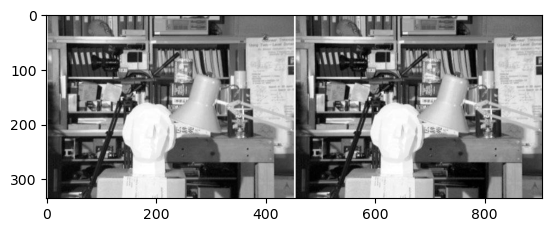

In [15]:
# CLAHE(Contrast Limited Adaptive Histogram Equalization)
# 플래시 터졌을 때를 생각해 보자!! 앞에만 밝고 뒤는 어둡다

img = cv.imread('../samples/clahe.png',0)
equ = cv.equalizeHist(img)
res = np.hstack((img,equ)) #stacking images side-by-side
plt.imshow(res, cmap='gray')

In [ ]:
img = cv.imread('../samples/clahe.png',0)
clahe = cv.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
cl1 = clahe.apply(img)
plt.imshow(cl1, cmap='gray')